# Simple Example for solving a Linear Program using PuLP

Objective Function:  Maximize z, where z= 2x + 3y <br>

Decision Variables: x & y <br>

Constraints: <br>
x >= 0 <br>
y >= 1 <br>
x + 2y <= 15 <br>
-2x + 4y >= -7 <br>
-2x + y <= 4

## Plotting the constraints graph

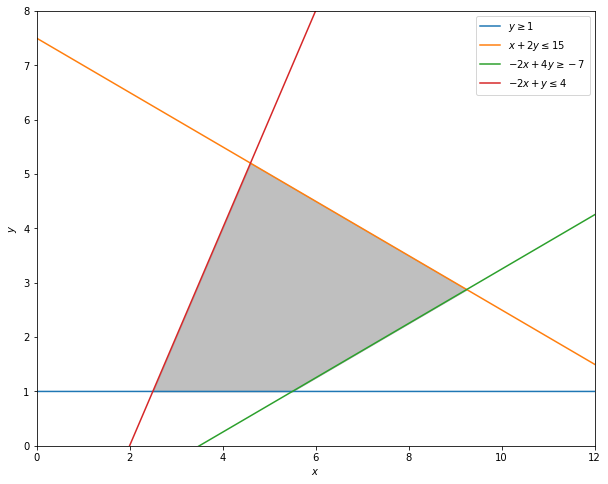

In [87]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 1
y1 = (x*0) + 1
# x+2y <= 15
y2 = (15-x)/2.0
# -2x + 4y <= -7
y3 = (2*x-7)/4.0
# -2x + y <= 4
y4 = 2 * x -4

plt.figure(figsize = (10,8)) 
# Make plot
plt.plot(x, y1, label=r'$y\geq1$')
plt.plot(x, y2, label=r'$x+2y\leq15$')
plt.plot(x, y3, label=r'$-2x + 4y\geq -7$')
plt.plot(x, y4, label=r'$-2x + y\leq 4$')

plt.xlim((0, 12))
plt.ylim((0, 8))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.legend()

## Solve the linear programming problem using PuLP

In [88]:
# import the pulp library 
import pulp as plp
  
# Create the LP Minimization problem 
Lp_prob = plp.LpProblem('LP Problem', plp.LpMaximize)  
  
# Create Target Variables  [x >= 0, y >= 1]
x = plp.LpVariable("x", lowBound = 0, cat = 'Integer')   
y = plp.LpVariable("y", lowBound = 1, cat = 'Integer')   
  
# Objective Function [z = 2x + 3y]
Lp_prob += 2 * x + 3 * y    
 
# Constraints: 
Lp_prob += x + 2 * y <= 15
Lp_prob += -2 * x + 4 * y >= -7
Lp_prob += -2 * x + y <= 4
Lp_prob += y >= 1
Lp_prob += x >= 0

  
# Display the problem 
print("Problem Details -  PuLP")
print(Lp_prob) 

# Solve the LP problem 
status = Lp_prob.solve()   
print(f"Solution Status: {plp.LpStatus[status]}")  
  
# Printing the final solution 
print(f"x = {plp.value(x)}, y = {plp.value(y)}, maximized z = {plp.value(Lp_prob.objective)}") 

Problem Details -  PuLP
LP_Problem:
MAXIMIZE
2*x + 3*y + 0
SUBJECT TO
_C1: x + 2 y <= 15

_C2: - 2 x + 4 y >= -7

_C3: - 2 x + y <= 4

_C4: y >= 1

_C5: x >= 0

VARIABLES
0 <= x Integer
1 <= y Integer

Solution Status: Optimal
x = 9.0, y = 3.0, maximized z = 27.0
